In [25]:
# 02_Preprocessamento.ipynb - Etapa 2
import os, sys
sys.path.append(os.path.abspath('../'))
import pandas as pd
import numpy as np

from src.data_preparation import load_data, impute_missing_values, standardize_text_categories
from src.outlier_handler import cap_outliers_iqr
from src.feature_engineering import create_features, one_hot_encode, scale_numeric

# ================================================
# Carregar dados brutos
# ================================================
path_raw = '../data/raw/delivery_time.csv'
df = load_data(path_raw)
print("Dimensões:", df.shape)
df.head()

# ================================================
# Tratar valores faltantes
# ================================================
num_cols = ['distance_km', 'package_weight_kg', 'driver_experience_years',
             'num_stops', 'customer_rating', 'fuel_cost', 'delivery_time_hours']

cat_cols = ['delivery_type', 'vehicle_type', 'traffic_condition', 'weather', 
            'time_of_day', 'day_of_week', 'is_priority', 'package_fragile', 'delivery_zone']

# Mantém apenas as colunas que existem
num_cols = [c for c in num_cols if c in df.columns]
cat_cols = [c for c in cat_cols if c in df.columns]

df_imputed = impute_missing_values(df, num_cols, cat_cols)
print("Valores faltantes após imputação:", df_imputed.isnull().sum().sum())

# ================================================
# Tratar outliers (IQR)
# ================================================
df_capped = cap_outliers_iqr(df_imputed, num_cols)

# ================================================
# Criar novas features
# ================================================
df_feat = create_features(df_capped)

# verificar novas colunas criadas
print([c for c in df_feat.columns if 'avg_speed' in c or 'time_per_km' in c])

# ================================================
# One-Hot Encoding
# ================================================
cat_cols = [c for c in cat_cols if c in df_feat.columns]
df_encoded = one_hot_encode(df_feat, cat_cols, drop_first=True)
print("Dimensões após encoding:", df_encoded.shape)

# ================================================
# Padronizar features numéricas
# ================================================
numeric_cols_present = [c for c in num_cols if c in df_encoded.columns]
extras = [c for c in ['avg_speed_kmh', 'time_per_km_h'] if c in df_encoded.columns]
numeric_cols_present += extras

df_scaled, scaler = scale_numeric(df_encoded, numeric_cols_present, save_path='../models/scaler.pkl')
print("Scaler salvo em ../models/scaler.pkl")

# ================================================
# Salvar dataset processado
# ================================================
os.makedirs('../data/processed', exist_ok=True)
processed_path = '../data/processed/delivery_processed.csv'
df_scaled.to_csv(processed_path, index=False)
print("Dataset processado salvo em:", processed_path)
print("Dimensões finais:", df_scaled.shape)


✅ Dataset carregado com sucesso: ../data/raw/delivery_time.csv
Dimensões: (2510, 17)
Valores faltantes após imputação: 0
['avg_speed_kmh', 'time_per_km_h']
Dimensões após encoding: (2510, 89)
Scaler salvo em ../models/scaler.pkl
Dataset processado salvo em: ../data/processed/delivery_processed.csv
Dimensões finais: (2510, 89)


In [ ]:
import pandas as pd

df_etapa2 = pd.read_csv(r"C:\Users\levie\asasas\projeto_ml\data\processed\delivery_processed.csv")

df_etapa2.head()


Tamanho dos DataFrames:
Etapa 1: (2510, 17)
Etapa 2: (2510, 89)

Colunas removidas na etapa 2:
{'delivery_type', 'day_of_week', 'traffic_condition', 'vehicle_type', 'delivery_zone', 'time_of_day', 'weather', 'package_fragile', 'is_priority'}

Colunas adicionadas na etapa 2:
{'vehicle_type_Moto', 'vehicle_type_Van', 'package_fragile_Yes', 'package_fragile_  Yes ', 'delivery_zone_urbana', 'traffic_condition_Médio', 'day_of_week_Sábado', 'weather_  Ensolarado ', 'time_of_day_Manhã', 'day_of_week_  Sexta ', 'vehicle_type_moto', 'weather_Ensolarado', 'time_of_day_  Noite ', 'delivery_type_  Standard ', 'package_fragile_no', 'delivery_zone_  Suburbana ', 'day_of_week_sexta', 'delivery_type_Economy', 'delivery_type_Standard', 'avg_speed_kmh', 'delivery_zone_Suburbana', 'delivery_zone_Rural', 'traffic_condition_  Baixo ', 'day_of_week_  Sábado ', 'time_of_day_Noite', 'vehicle_type_carro', 'traffic_condition_alto', 'time_of_day_  Tarde ', 'vehicle_type_caminhão', 'delivery_type_economy', 'vehic

Etapa 1                                                            \
       delivery_id  distance_km package_weight_kg delivery_type vehicle_type   
count         2510  2397.000000       2315.000000          2510         2510   
unique        2510          NaN               NaN             9           11   
top       DEL00331          NaN               NaN      Standard        Carro   
freq             1          NaN               NaN          1424          996   
mean           NaN    16.552603          5.578324           NaN          NaN   
std            NaN    14.916946          6.722003           NaN          NaN   
min            NaN    -9.620000         -3.080000           NaN          NaN   
25%            NaN     8.480000          3.000000           NaN          NaN   
50%            NaN    15.020000          4.970000           NaN          NaN   
75%            NaN    21.980000          6.990000           NaN          NaN   
max            NaN   195.800000         99.080000           NaN          NaN   

                                                              \
       traffic_condition     weather time_of_day day_of_week   
count               2255        2510        2510        2510   
unique                12          13          11          12   
top                Médio  Ensolarado       Tarde     Seg-Qui   
freq                 881        1263         985        1469   
mean                 NaN         NaN         NaN         NaN   
std                  NaN         NaN         NaN         NaN   
min                  NaN         NaN         NaN         NaN   
25%                  NaN         NaN         NaN         NaN   
50%                  NaN         NaN         NaN         NaN   
75%                  NaN         NaN         NaN         NaN   
max                  NaN         NaN         NaN         NaN   

                                ...             Etapa 2                     \
       driver_experience_years  ... package_fragile_Yes package_fragile_no   
count              2345.000000  ...                2510               2510   
unique                     NaN  ...                   2                  2   
top                        NaN  ...               False              False   
freq                       NaN  ...                1793               2499   
mean                  4.870917  ...                 NaN                NaN   
std                   3.245853  ...                 NaN                NaN   
min                   0.000000  ...                 NaN                NaN   
25%                   3.000000  ...                 NaN                NaN   
50%                   4.000000  ...                 NaN                NaN   
75%                   7.000000  ...                 NaN                NaN   
max                  36.500000  ...                 NaN                NaN   

                                                                               \
       package_fragile_yes delivery_zone_  Suburbana  delivery_zone_  Urbana    
count                 2510                       2510                    2510   
unique                   2                          2                       2   
top                  False                      False                   False   
freq                  2506                       2505                    2498   
mean                   NaN                        NaN                     NaN   
std                    NaN                        NaN                     NaN   
min                    NaN                        NaN                     NaN   
25%                    NaN                        NaN                     NaN   
50%                    NaN                        NaN                     NaN   
75%                    NaN                        NaN                     NaN   
max                    NaN                        NaN                     NaN   

                                                                    


===== COMPARAÇÃO DE VALORES NULOS =====


,Etapa 1,Etapa 2
avg_speed_kmh,NaN,0.0
customer_rating,149.0,0.0
day_of_week,0.0,NaN
day_of_week_ Seg-Qui,NaN,0.0
day_of_week_ Sexta,NaN,0.0
...,...,...
weather_Tempestade,NaN,0.0
weather_chuva forte,NaN,0.0
weather_chuva leve,NaN,0.0
weather_ensolarado,NaN,0.0


Colunas numéricas comparadas:
['driver_experience_years', 'fuel_cost', 'customer_rating', 'delivery_time_hours', 'package_weight_kg', 'num_stops', 'distance_km']


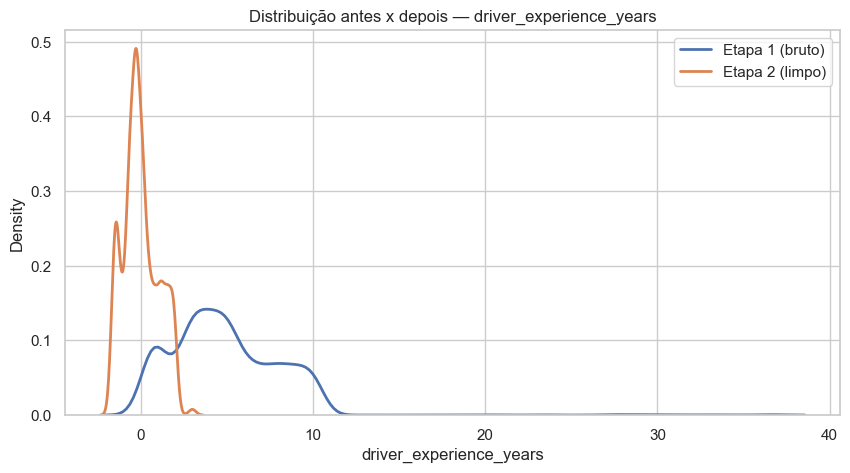

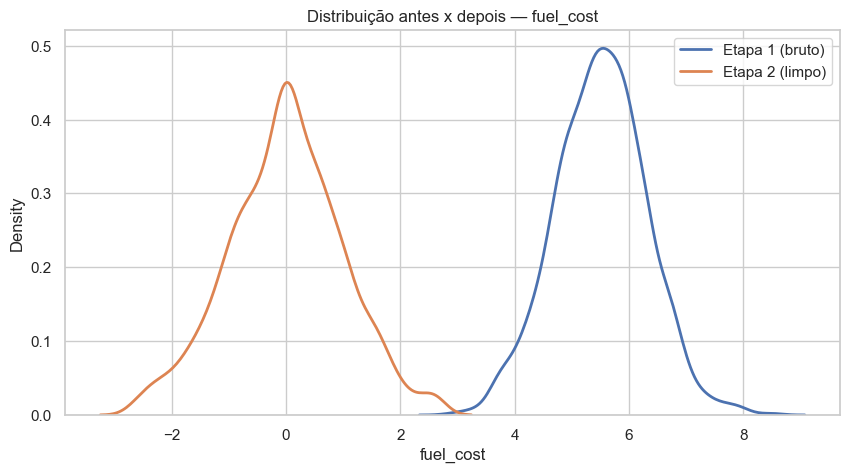

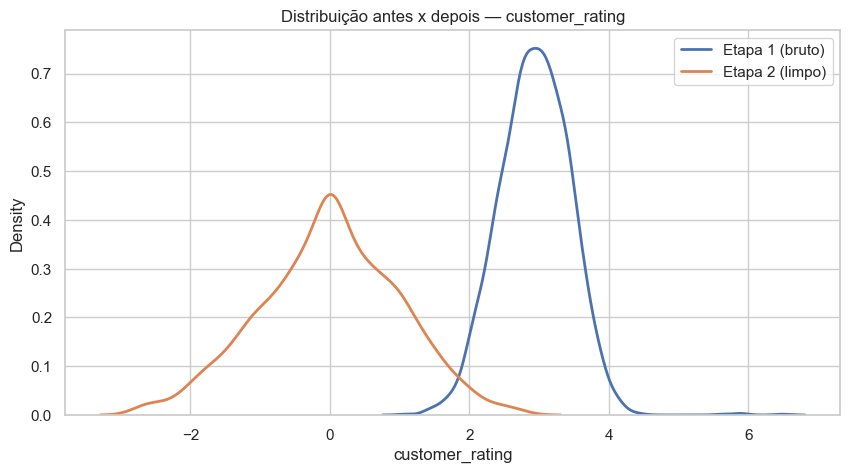

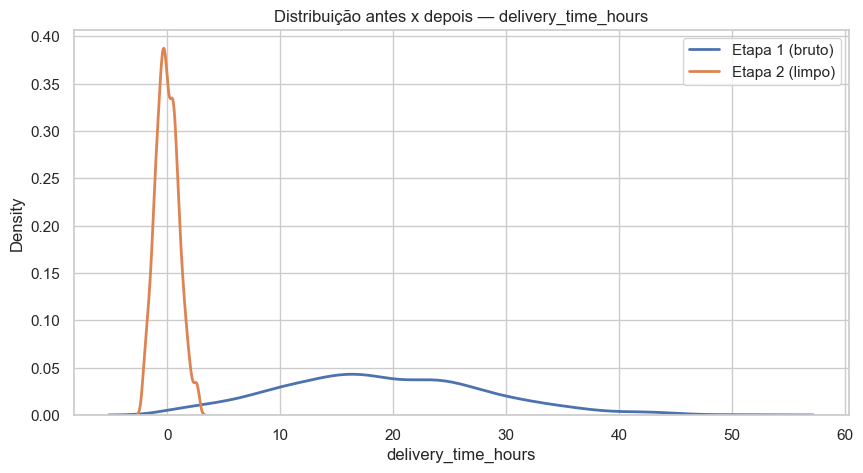

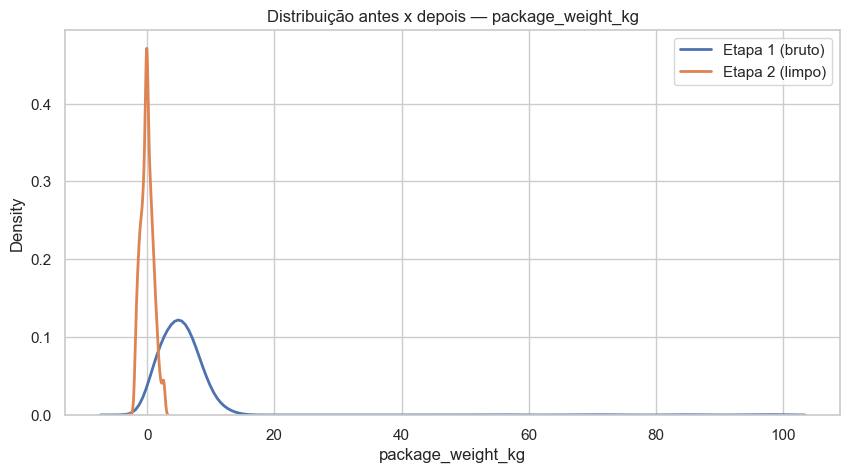

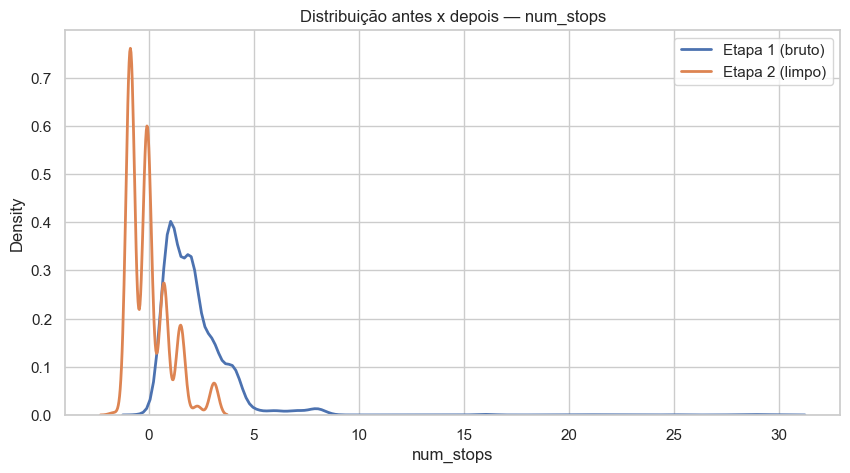

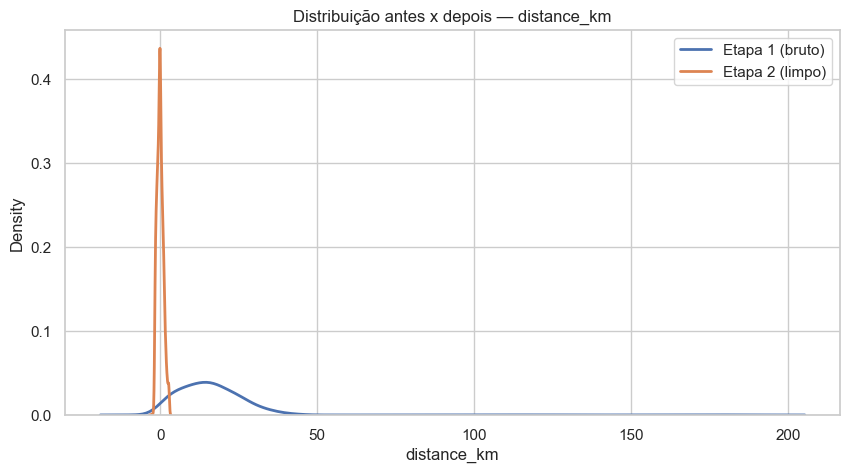

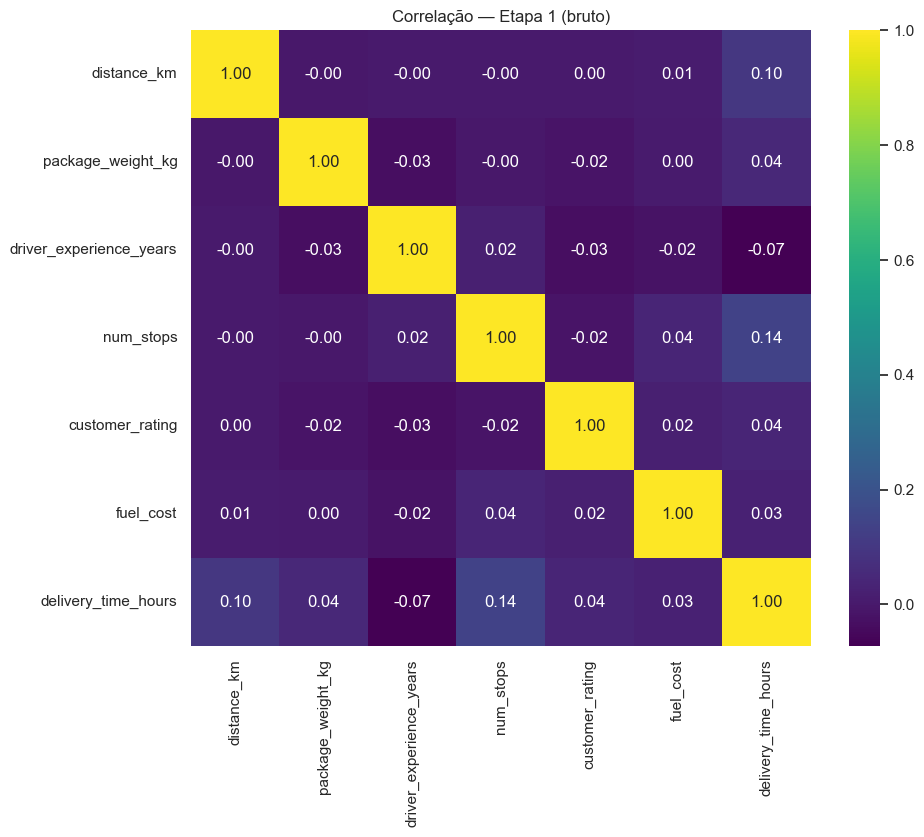

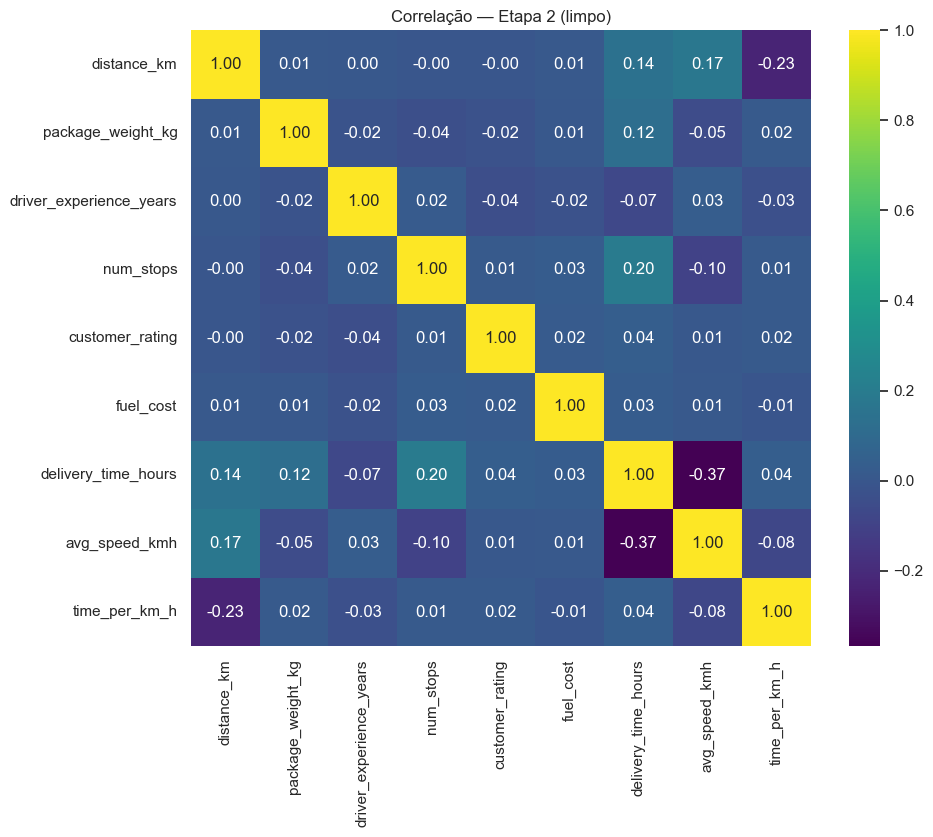

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 1. Carregar os dados
# ============================
df1 = pd.read_csv(r"C:\Users\levie\asasas\projeto_ml\data\raw\delivery_time.csv")               
df2 = pd.read_csv(r"C:\Users\levie\asasas\projeto_ml\data\processed\delivery_processed.csv")  

# ============================
# 2. Comparar tamanho
# ============================
print("Tamanho dos DataFrames:")
print("Etapa 1:", df1.shape)
print("Etapa 2:", df2.shape)

# ============================
# 3. Comparar colunas removidas, adicionadas ou alteradas
# ============================
colunas_etapa1 = set(df1.columns)
colunas_etapa2 = set(df2.columns)

print("\nColunas removidas na etapa 2:")
print(colunas_etapa1 - colunas_etapa2)

print("\nColunas adicionadas na etapa 2:")
print(colunas_etapa2 - colunas_etapa1)

print("\nColunas mantidas:")
print(colunas_etapa1 & colunas_etapa2)

# ============================
# 4. Comparar estatísticas numéricas
# ============================
comparacao_stats = pd.concat(
    [df1.describe(include='all'), df2.describe(include='all')],
    axis=1,
    keys=['Etapa 1', 'Etapa 2']
)

print("\n===== ESTATÍSTICAS COMPARADAS =====")
display(comparacao_stats)

# ============================
# 5. Comparar quantidade de valores nulos
# ============================
nulos = pd.DataFrame({
    "Etapa 1": df1.isnull().sum(),
    "Etapa 2": df2.isnull().sum()
})

print("\n===== COMPARAÇÃO DE VALORES NULOS =====")
display(nulos)

# ============================
# 6. Gráfico: comparação de distribuições (para numéricos)
# SOMENTE COLUNAS QUE EXISTEM NOS DOIS DATAFRAMES
# ============================

numericas1 = df1.select_dtypes(include=['int64', 'float64']).columns
numericas2 = df2.select_dtypes(include=['int64', 'float64']).columns

# interseção = apenas colunas numéricas presentes nas duas etapas
numericas_comuns = list(set(numericas1) & set(numericas2))

print("Colunas numéricas comparadas:")
print(numericas_comuns)

for col in numericas_comuns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df1[col], label="Etapa 1 (bruto)", linewidth=2)
    sns.kdeplot(df2[col], label="Etapa 2 (limpo)", linewidth=2)
    plt.title(f"Distribuição antes x depois — {col}")
    plt.legend()
    plt.show()


# ============================
# 7. Correlação antes x depois
# ============================

corr1 = df1.select_dtypes(include=['int64', 'float64']).corr()
corr2 = df2.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr1, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlação — Etapa 1 (bruto)")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlação — Etapa 2 (limpo)")
plt.show()

